In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from utils import scatter_plot

# Import Dataset

In [2]:
train = pd.read_csv('./data/thalweg_train_set.csv', converters={'site_no': str}, low_memory=False)
test = pd.read_csv('./data/thalweg_test_set.csv', converters={'site_no': str}, low_memory=False)

## LOC Results

In [3]:
X_train = (train['mean_depth_va']*0.3048).to_numpy()
y_train = (train['max_depth_va']*0.3048).to_numpy()
X_test = (test['mean_depth_va']*0.3048).to_numpy()
y_test = (test['max_depth_va']*0.3048).to_numpy()

In [4]:
slope = (np.std(y_train) / np.std(X_train))
intercept = (np.mean(y_train) - (np.std(y_train) / np.std(X_train)) * np.mean(X_train))
print(f'slope:{slope:.4f}')
print(f'intercept:{intercept:.4f}')

slope:1.4804
intercept:-0.0149


In [5]:
y_loc = (slope * X_test) + intercept

In [6]:
idx = y_loc - y_test

pct = 0.005
y_loc_ci = y_loc[(idx > np.quantile(idx, pct)) & (idx < np.quantile(idx, 1-pct))]
y_test_ci = y_test[(idx > np.quantile(idx, pct)) & (idx < np.quantile(idx, 1-pct))]

test size: (8837,), pred size: (8837,)
NSE: 0.9490, R2: 0.9517, PBias: -0.5607, RMSE: 0.4733


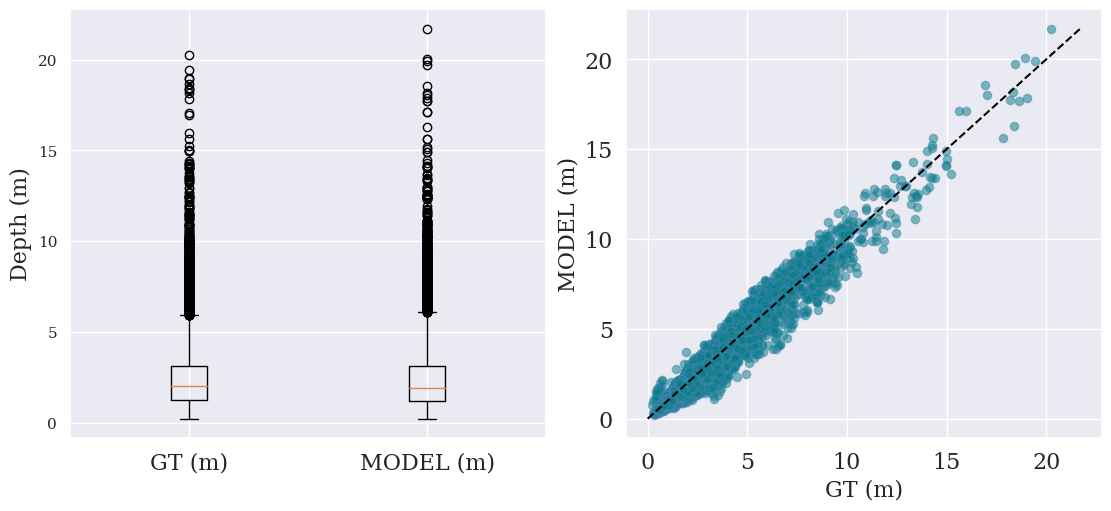

In [7]:
scatter_plot(y_test_ci, y_loc_ci)

# MLP Results

In [8]:
data = np.loadtxt('./data/ml-test.out', delimiter=',')
y_mlp = data[:, 1] * 0.3048

In [9]:
idx2 = y_mlp - y_test

pct = 0.005
y_mlp_ci = y_mlp[(idx2 > np.quantile(idx2, pct)) & (idx2 < np.quantile(idx2, 1-pct))]
y_test_ci2 = y_test[(idx2 > np.quantile(idx2, pct)) & (idx2 < np.quantile(idx2, 1-pct))]

test size: (8837,), pred size: (8837,)
NSE: 0.9450, R2: 0.9459, PBias: -1.7621, RMSE: 0.4910


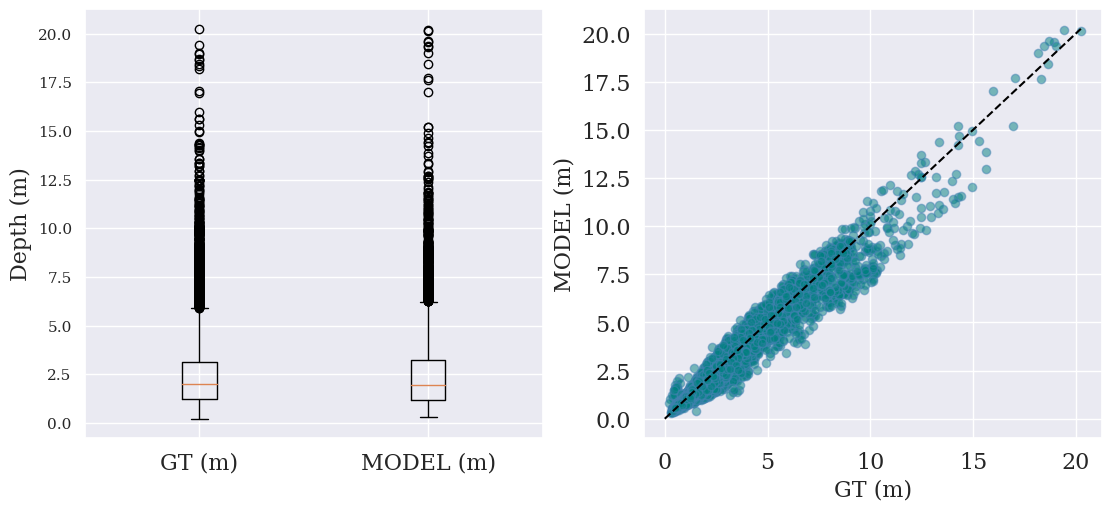

In [10]:
scatter_plot(y_test_ci2, y_mlp_ci)

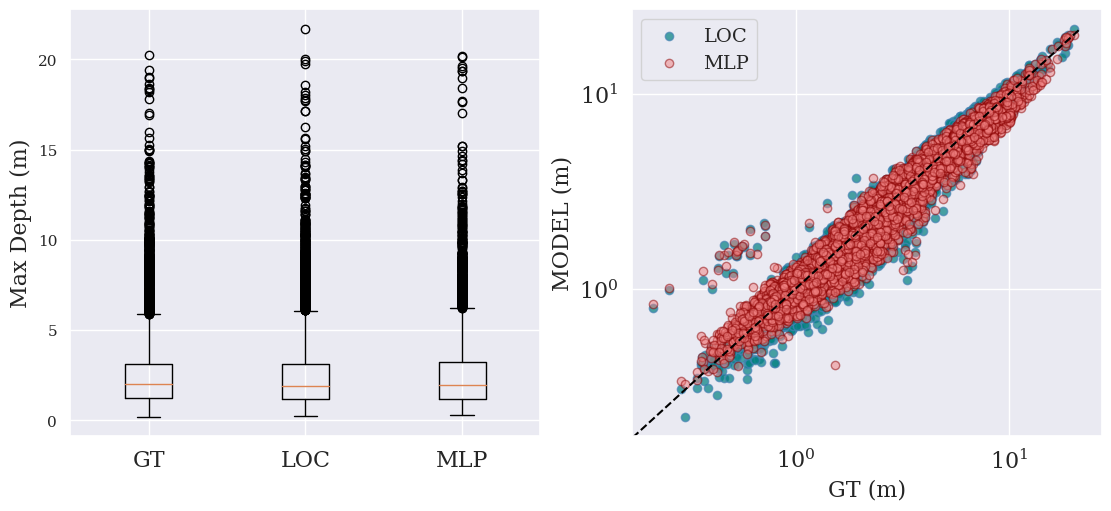

In [11]:
yt = np.array(y_test_ci).reshape(-1,)
yt2 = np.array(y_test_ci2).reshape(-1,)
y_loc = np.array(y_loc_ci).reshape(-1,)
y_mlp = np.array(y_mlp_ci).reshape(-1,)

plt.rcParams.update({
    # 'font.sans-serif': 'Comic Sans MS',
    'font.family': 'serif'
})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5), constrained_layout=True)

ax1.boxplot([yt, y_loc, y_mlp], notch=False, showfliers=True)
ax1.set_xticklabels(['GT', 'LOC', 'MLP'])
ax1.tick_params(axis='x', labelrotation=0, labelsize=16)
ax1.set_ylabel(f'Max Depth (m)', fontsize=16)

ax1.grid(True)
# ax1.set_title(f'BOX PLOT')

max_value = np.array((yt, y_loc, y_mlp)).max()

ax2.scatter(yt, y_loc, color='teal', edgecolor='steelblue', alpha=0.7, label='LOC')
ax2.scatter(yt2, y_mlp, color='lightcoral', edgecolor='darkred', alpha=0.5, label='MLP')
ax2.plot([0, max_value], [0, max_value], '--', color='black', linewidth=1.5)

ax2.set_xlabel(f'GT (m)', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
# ax2.set_xlim(0, max_value)
ax2.set_yscale('log')
ax2.set_xscale('log')

ax2.set_ylabel(f'MODEL (m)', fontsize=16)
ax2.tick_params(axis='y', labelsize=16)
# ax2.set_ylim(0, max_value)
ax2.grid(True)

plt.legend(fontsize=14)
plt.savefig(f'./data/loc_vs_mlp.svg', format='svg', bbox_inches='tight', pad_inches=0.1)

plt.show()


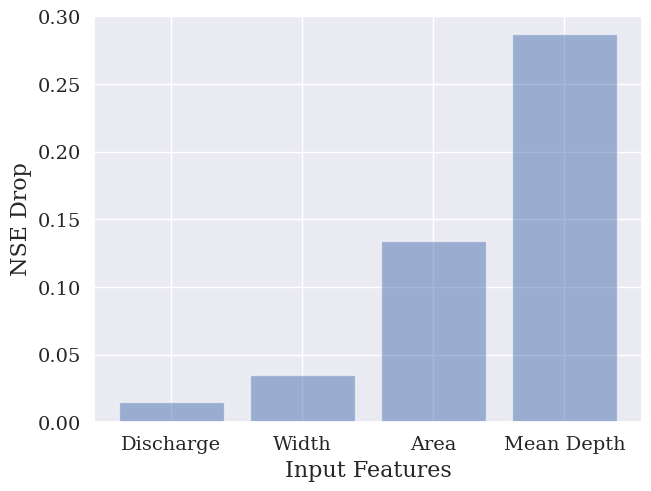

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

plt.rcParams.update({
    # 'font.sans-serif': 'Comic Sans MS',
    'font.family': 'serif'
})

input_features = ['Discharge', 'Width', 'Area', 'Mean Depth']
pos = np.arange(len(input_features))
pi = [0.0150, 0.0351, 0.1339, 0.2869]

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(pos, pi, align='center', alpha=0.5)
ax.set_xticks(pos, input_features)
ax.tick_params(axis='x', labelrotation=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.set_ylabel('NSE Drop', fontsize=16)
ax.set_xlabel('Input Features', fontsize=16)

plt.grid(True)

plt.savefig(f'./data/ftr_imp.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
